The EM algorithm is a popular tool for simplifying difficult maximum likelihood problems. We first describe it in the context of a simple mixture model

<font color='blue'>**Two-Component Mixture Model**</font>

We are given a small toy dataset, as plotted below 

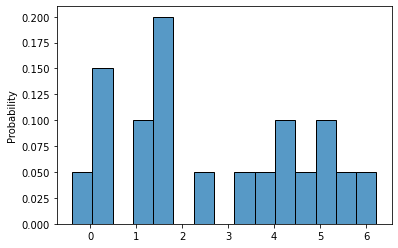

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

x = np.array([-0.39,0.12,0.94,1.67,1.76,2.44,3.72,4.28,4.92,5.53,0.06,0.48,1.01
              ,1.68,1.80,3.25,4.12,4.60,5.28,6.22])
#x = np.sort(x)
sns.histplot(x,stat="probability",bins=15)
# Plotting the density curve

${EM \text{ }Algorithm\text{ } for\text{ } Two-component\text{ } Gaussian \text{ }Mixture}$

1. Take initial guesses for the parameters $\hat{\mu_1},\hat{σ_1^2},\hat{\mu_2},\hat{σ_2^2},\hat{π}$

2. $Expectation\text{ } Step$: Compute the responsibilities
\begin{align*}
\hat{\gamma_i} = \frac{\hat{π}𝛷_{\hat{θ_2}}(y_i)}{(1-\hat{π})𝛷_{\hat{θ_1}}(y_i)+ \hat{π}𝛷_{\hat{θ_2}}(y_i)}  \text{   }i = 1,2,\ldots,N
\end{align*}

3.$Maximization\text{ } Step$: compute the weighted means and variances:\
$\hat{\mu}_1 = \frac{∑_{i=1}^N((1-\hat{\gamma}_i)y_i}{∑_{i=1}^N(1-\hat{\gamma}_i)}$ $\text{  }$  $\hat{σ_1^2} = \frac{∑_{i=1}^N(1-\hat{\gamma}_i)(y_i-\hat{\mu_1})^2}{∑_{i=1}^N(1-\hat{γ}_i)}$ $\hat{\mu}_2 = \frac{∑_{i=1}^N\hat{\gamma}_iy_i}{∑_{i=1}^N\hat{\gamma}_i}$ $\text{  }$  $\hat{σ_2^2} = \frac{∑_{i=1}^N\hat{\gamma}_i(y_i-\hat{\mu_2})^2}{∑_{i=1}^N\hat{γ}_i}$

and the mixing probability $\hat{π} = ∑_{i=1}^N \hat{γ_i}/N$

4. Iterate steps 2 and 3 until convergence.

## Univariate Gaussiam Mixture Implementaion of EM

In [ ]:
def univariateGaussian(x,mu,var):

  sigma = np.sqrt(var)

  u = (x - mu)/abs(sigma)
  density = (1/(np.sqrt(2*np.pi)* abs(sigma)))* np.exp(-u*u/2)

  #density = (1/(np.sqrt(2*np.pi)* abs(sigma)))* np.exp(-(np.square(x-mu)/(2*np.square(sigma))))

  return density

In [ ]:
######################################################################
# Implementation of EM algorithm,for a simple Univarite data list.
# The Data used, is the same used to build the histogram above
######################################################################
class EM1:

  ######################################################################
  # Initializing the parameters 
  # Mean-1,Mean-2, Variance-1, Variance-2 & mix 
  ######################################################################

  def __init__(self,x):
    self.x = x
    self.mean_1 = 4.12 # Random Initialization of means 
    self.mean_2 = 5.28
    
    self.var_1 = self.var_2 =  1/len(self.x) * np.sum(np.square(self.x-np.mean(self.x)))
    self.mix = 0.5

  ######################################################################
  # Below function executes the Expectation Step of the EM algorithm
  # i.e calculate the responsibility value "gamma"
  ######################################################################

  def expectation(self):

    self.phi_1 = univariateGaussian(self.x,self.mean_1,self.var_1)
    self.phi_2 = univariateGaussian(self.x,self.mean_2,self.var_2)
   
    # Responsibility of Model-2
    self.gamma = (self.mix* self.phi_2)/(((1-self.mix)*self.phi_1) + (self.mix*self.phi_2))

    return self.gamma

  ######################################################################
  # Below function executes the maximization Step of the EM algorithm
  # Implements the closed form equations for updating the 
  # algorithm parameters. 
  ######################################################################

  def maximization(self):

    self.mean_1 = np.sum((1-self.gamma)*self.x)/np.sum(1-self.gamma)
    self.mean_2 = np.sum(self.gamma*self.x)/np.sum(self.gamma)


    self.var_1 = np.sum((1-self.gamma)*((self.x-self.mean_1)**2))/np.sum(1-self.gamma)
    self.var_2 = np.sum(self.gamma*((self.x-self.mean_2)**2))/np.sum(self.gamma)
 
    self.mix = np.sum(self.gamma)/len(self.x)

    return self.mix,self.mean_1,self.mean_2,self.var_1,self.var_2

  ######################################################################
  # Calculates the log-LikeLihood after each iteration
  # Basically to view the grapy of how the liklihood converges.
  ######################################################################

  def logLikeLihood(self):

    # Calculating the log Likelihood
    self.loglikehood = np.sum(((1-self.gamma)*np.log(self.phi_1)) + (self.gamma*np.log(self.phi_2)) +\
    ((1-self.gamma)*np.log(1-self.mix))+(self.gamma*np.log(self.mix)))

    return self.loglikehood

  ######################################################################
  # EM is an iterative algorithm
  # EMIteration facilitates the execution of the E & M steps,
  # until convergence.
  ######################################################################

  def EMIteration(self):

    Newlog = 10
    _ = self.expectation()
    loglikehoodlst = []
    Oldlog = self.logLikeLihood()
    loglikehoodlst.append(Oldlog)
    while abs(Newlog - Oldlog) > 0.00001:

      Oldlog = Newlog
      _ = self.maximization()
      _ = self.expectation()
      Newlog = self.logLikeLihood()
      loglikehoodlst.append(Newlog)

    finalResponsibilityAssng =  self.expectation()

    return   finalResponsibilityAssng , loglikehoodlst

In [ ]:
# Execution #
EM = EM1(x)
gamma,loglst = EM.EMIteration()
mix,mean_1,mean_2,var_1,var_2 = EM.maximization()

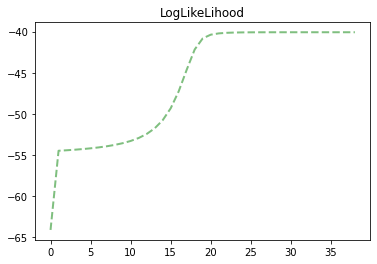

In [ ]:
t = np.arange(0,len(loglst))
plt.plot(t,loglst,color='green',alpha=0.5, linestyle='dashed',linewidth=2)
plt.title("LogLikeLihood")
plt.show()

In [ ]:

density1 = []
for i in range(0,100):
  val = np.random.normal(mean_1,var_1,1)
  density1.append(val)

density2 = []
for i in range(0,100):
  val = np.random.normal(mean_2,var_2,1)
  density2.append(val)

density1 = np.array(density1).ravel()
density2 = np.array(density2).ravel()


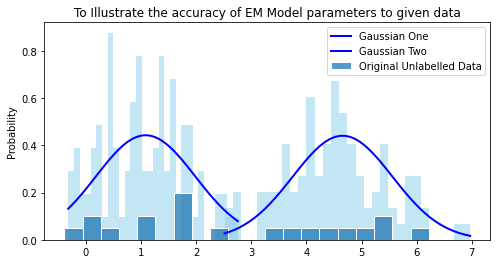

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
from scipy.stats import norm
arr = np.random.randn(100)

plt.figure(figsize=(8,4))
plt.hist(density1,bins=30, density=True,color='skyblue',alpha=0.5)
plt.hist(density2,bins=30, density=True,color='skyblue',alpha=0.5)



sigma1 = np.sqrt(var_1)
sigma2 = np.sqrt(var_2)
x1 = np.linspace(min(density1), max(density1), 50)
x2 = np.linspace(min(density2), max(density2), 50)
sns.histplot(x,stat="probability",bins=20,edgecolor='white',label='Original Unlabelled Data')
plt.plot(x1, norm.pdf(x1, mean_1, sigma1),color='blue',linewidth=2,label='Gaussian One')
plt.plot(x2, norm.pdf(x2, mean_2, sigma2),color='blue',linewidth=2,label='Gaussian Two')
plt.title("To Illustrate the accuracy of EM Model parameters to given data")
plt.legend()
plt.show()

## Multivariate Gaussian Implementation of EM
